<a href="https://colab.research.google.com/github/minsoojo/MLprogramming/blob/main/2week/weatherRegr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# -----------------------------
# 1) 데이터 준비
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/3-2/MLprogramming/2week/weather.csv")
df  # print(df) 와 동일

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [38]:
# 결측치 확인
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31


In [39]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [40]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

/tmp/ipython-input-2194023618.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoders[column].fit_transform(df[column])
/tmp/ipython-input-2194023618.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoders[column].fit_transform(df[column])
/tmp/ipython-input-2194023618.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [41]:
df # 모든 컬럼 값이 숫자로 변경되었는지 확인

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,59,0,90,111,0,15,43,7,8,12,...,15,93,82,7,7,95,129,0,16,1
1,70,0,138,130,16,20,75,1,12,0,...,22,37,27,5,3,123,145,1,16,1
2,81,0,135,106,16,27,24,7,33,3,...,55,20,22,8,7,103,99,1,43,1
3,83,0,133,42,43,34,69,7,20,14,...,42,7,21,2,7,88,50,1,13,1
4,84,0,86,46,13,26,84,10,18,10,...,35,84,113,7,7,68,60,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,0,100,152,0,36,99,6,29,10,...,2,64,46,1,3,148,167,0,0,0
362,48,0,81,141,0,51,104,3,17,6,...,8,95,98,0,1,120,160,0,0,0
363,49,0,125,78,0,40,36,2,14,1,...,33,131,147,3,2,96,81,0,0,0
364,51,0,125,130,0,23,50,7,16,11,...,25,103,91,6,7,107,146,0,0,0


In [42]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [43]:
targetObject = "MaxTemp"

In [44]:
# 입력과 출력 분리
df.drop(columns=["Location"])
X = df.drop(columns=[targetObject])
y = df[targetObject]

In [45]:
X # 분리 후 확인

,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,59,0,90,0,15,43,7,8,12,7,...,15,93,82,7,7,95,129,0,16,1
1,70,0,138,16,20,75,1,12,0,13,...,22,37,27,5,3,123,145,1,16,1
2,81,0,135,16,27,24,7,33,3,5,...,55,20,22,8,7,103,99,1,43,1
3,83,0,133,43,34,69,7,20,14,13,...,42,7,21,2,7,88,50,1,13,1
4,84,0,86,13,26,84,10,18,10,2,...,35,84,113,7,7,68,60,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,0,100,0,36,99,6,29,10,7,...,2,64,46,1,3,148,167,0,0,0
362,48,0,81,0,51,104,3,17,6,6,...,8,95,98,0,1,120,160,0,0,0
363,49,0,125,0,40,36,2,14,1,1,...,33,131,147,3,2,96,81,0,0,0
364,51,0,125,0,23,50,7,16,11,14,...,25,103,91,6,7,107,146,0,0,0


In [46]:
y # 분리 후 확인

,MaxTemp
0,111
1,130
2,106
3,42
4,46
...,...
361,152
362,141
363,78
364,130


In [47]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=12)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)

((262, 23), (66, 23), (262,), (66,))

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()         # 모델 구성
model.fit(X_train, y_train)        # 모델 훈련
ly_preds = model.predict(X_test)   # 예측데이터 생성
print(mean_squared_error(y_test, ly_preds))  #평가

35.6949896796618


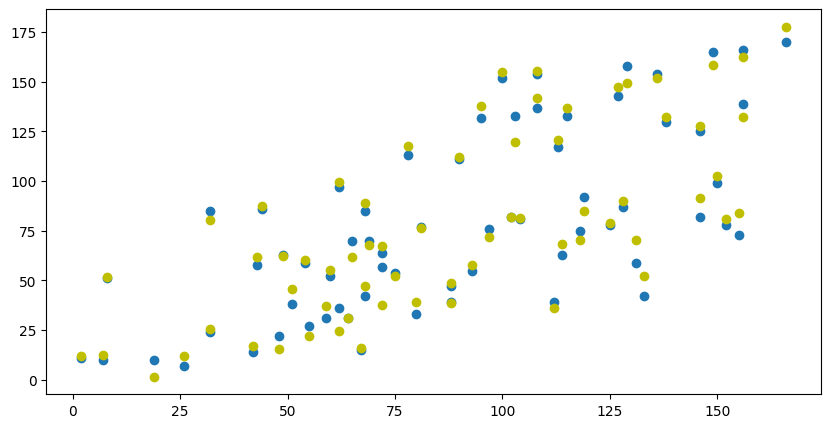

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(X_test['MinTemp'], y_test, label='y_test')
plt.scatter(X_test['MinTemp'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [52]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 41.76775151515152


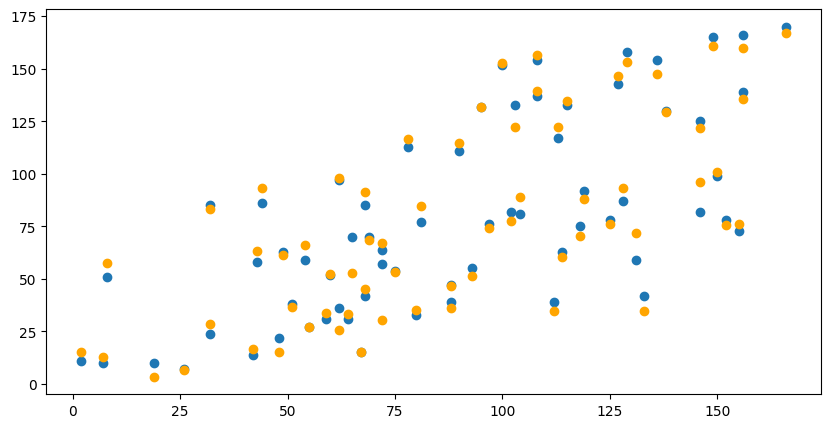

In [53]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MinTemp'], y_test, label='y_test')
plt.scatter(X_test['MinTemp'], ry_preds, c='orange', label='ry_preds')

plt.show()